In [1]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

cifar_mnist = tf.keras.datasets.cifar10

(train_images, train_labels),(test_images, test_labels) = cifar_mnist.load_data()

In [2]:
class_names = ['Airplane','Car','Birs','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
test_labels.shape

(10000, 1)

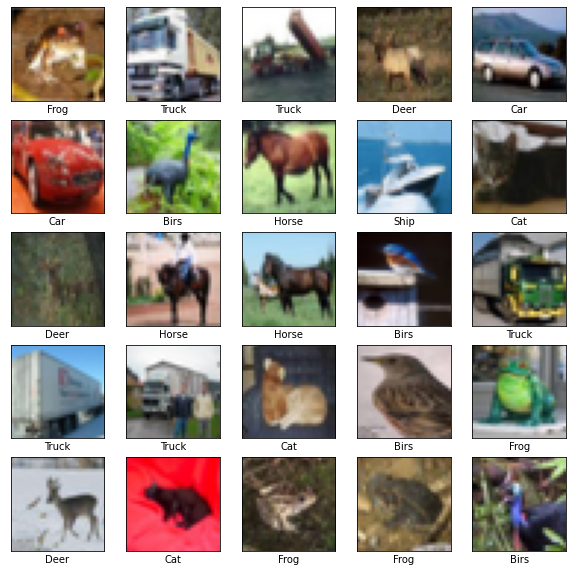

In [4]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
train_images  = train_images.astype('float32')  / 255
test_images  = test_images.astype('float32')  / 255

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [29]:
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=100, batch_size=20, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

loss, acc = model.evaluate(test_images, test_labels, verbose=2)

print(loss, acc)




Epoch 00001: val_loss improved from inf to 1.38322, saving model to ./model\01-1.3832.hdf5

Epoch 00002: val_loss improved from 1.38322 to 1.25411, saving model to ./model\02-1.2541.hdf5

Epoch 00003: val_loss improved from 1.25411 to 1.11390, saving model to ./model\03-1.1139.hdf5

Epoch 00004: val_loss improved from 1.11390 to 1.10605, saving model to ./model\04-1.1060.hdf5

Epoch 00005: val_loss improved from 1.10605 to 1.01187, saving model to ./model\05-1.0119.hdf5

Epoch 00006: val_loss improved from 1.01187 to 0.98521, saving model to ./model\06-0.9852.hdf5

Epoch 00007: val_loss improved from 0.98521 to 0.97575, saving model to ./model\07-0.9757.hdf5

Epoch 00008: val_loss improved from 0.97575 to 0.94953, saving model to ./model\08-0.9495.hdf5

Epoch 00009: val_loss improved from 0.94953 to 0.92481, saving model to ./model\09-0.9248.hdf5

Epoch 00010: val_loss improved from 0.92481 to 0.89155, saving model to ./model\10-0.8915.hdf5

Epoch 00011: val_loss did not improve from 

TypeError: not all arguments converted during string formatting

In [30]:
print(f'test loss : {loss:.4f} / test acc : {acc*100:.2f} %')

#예측(Prediction) 실행
#: 학습된 모델을 사용하여, 이미지에 대한 예측이 가능
#: Test set에 있는 각 이미지의 Label 예측은 10개의 배열로 표시됨.
# 10개의 옷 품목에 상응하는 모델의 신뢰도 중 가장 높은 신뢰도를 찾아야 함

predictions = model.predict(test_images)    
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

test loss : 0.8421 / test acc : 73.79 %
[1.1364855e-03 3.1442475e-04 7.7337124e-03 8.6260825e-01 7.9100775e-03
 8.8831246e-02 2.4404382e-02 3.4768367e-03 2.5845505e-03 1.0001402e-03]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


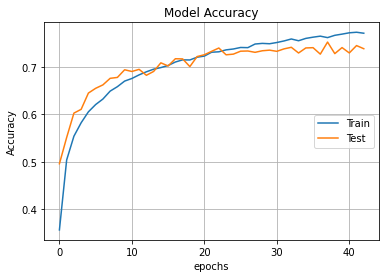

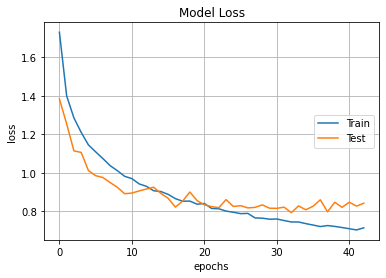

In [31]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) 
    plt.title('Model Loss')
    plt.legend(['Train','Test'], loc='right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid()

             
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.legend(['Train','Test'], loc='right')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.grid()  

             
plt_show_acc(history)  
plt.show()
plt_show_loss(history)
plt.show()

predictions = model.predict(test_images)

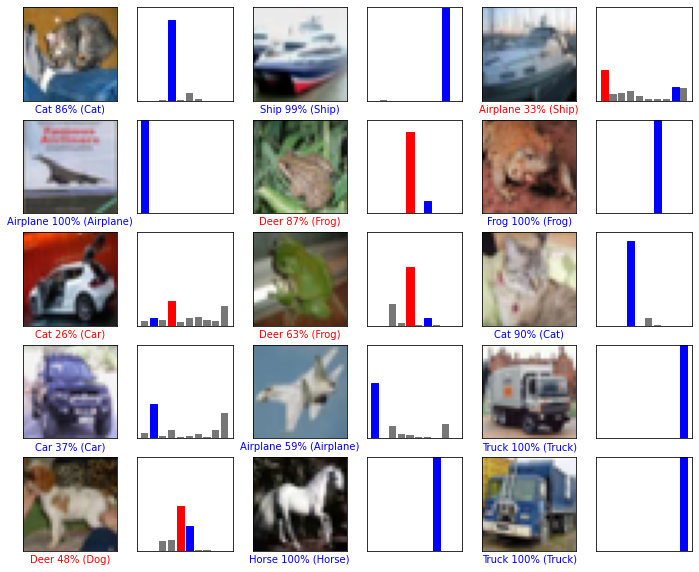

In [33]:
# 이미지 클래스를 예측하여 그래프/신뢰도를 출력하는 함수 정의

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array), 
                                  class_names[np.argmax(true_label)]), 
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')
    
        
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()